In [81]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [161]:
buildings = pd.read_csv("https://uiuc-ischool-dataviz.github.io/is445_AOUAOG_fall2021/week02/data/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 

In [162]:
buildings # Viewing data set

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided


(1750.0, 2024.0)

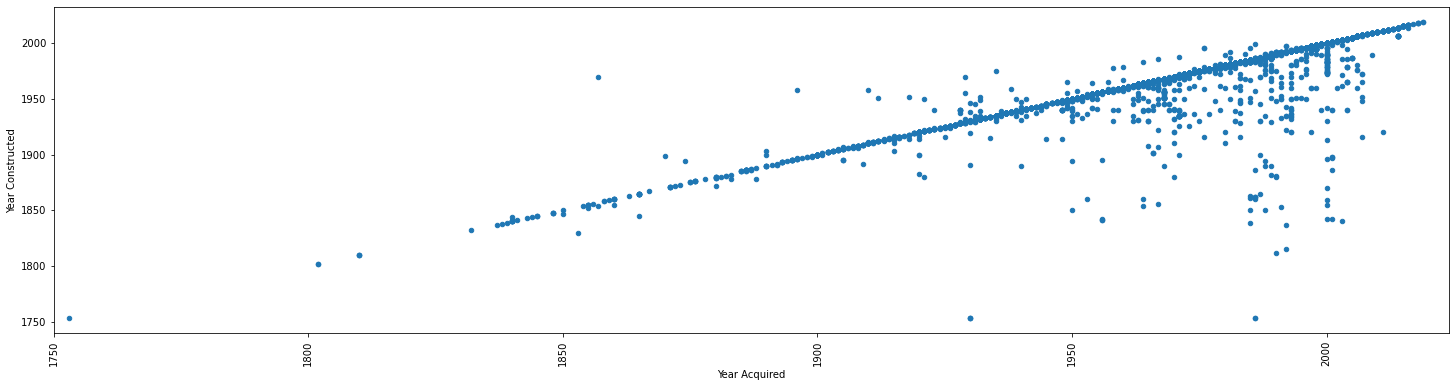

In [163]:
# Relationship between the year acquired and the year constructed
ax = buildings.plot(x = "Year Acquired", y="Year Constructed", figsize=(25,6), rot=90, kind='scatter')
ax.set_xlim(1750, 2024)

This graph is a simple comparison between the year a building was acquired vs the year that building was constructed. Upon looking at this scatter plot, we can see that the two variables are directly prorotional, as time progressed the school has acquired more more buildings that have been constructed earlier, and the school to has been acquiring buildings as they are built, shown by th elinear pattern of the plot.

<AxesSubplot:xlabel='Bldg Status', ylabel='Square Footage'>

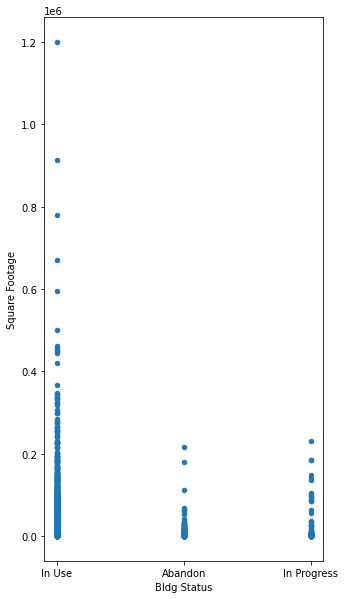

In [164]:
# Total square footage as a function of building status ("Bldg Status")
buildings.plot(x="Bldg Status", y="Square Footage", figsize=(5,10), kind='scatter')

In [165]:
# Total square footage as a function of building status ("Bldg Status")
bs = buildings.groupby("Bldg Status")["Square Footage"].sum()
bs

Bldg Status
Abandon         2048290.0
In Progress     2314558.0
In Use         97337698.0
Name: Square Footage, dtype: float64

(200000.0, 100000000.0)

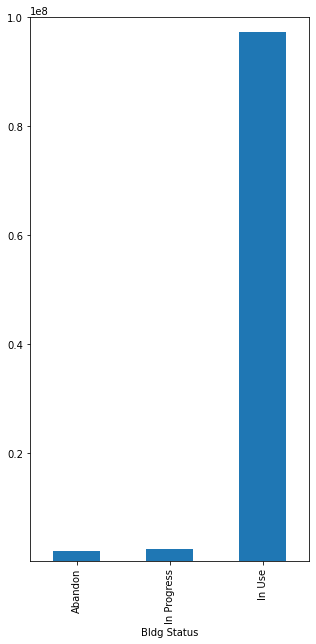

In [166]:
# Total square footage as a function of building status ("Bldg Status")
a = bs.plot(figsize=(5,10), kind='bar')
a.set_ylim(200000, 100000000)

For this visualization, We are able to view the total square footage that is currently in use by the school, in progress of being built, and has been abandoned. Since we were comparing total numbers, I thought A bar graph would be the best use for comparison, which makes it easy to see that the school has much much more square footage in use than abandoned and in progress combined. I too included a scatter plot to show more individual values, but I do think that the bar is a better job for what the question asks, and I too included the total values for easier comparison, but had trouble accuartly representing them easily on the plots.

(1800.0, 2022.0)

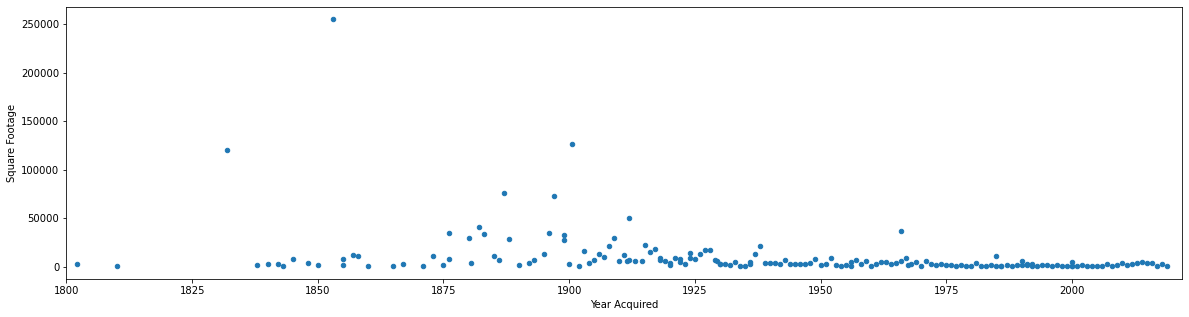

In [167]:
# Median square footage in each Year Constructed as a function of Year Acquired
msf = buildings.groupby("Year Constructed")[["Square Footage","Year Acquired"]].median()
b = msf.plot(x = "Year Acquired", y= "Square Footage", figsize=(20,5), kind = 'scatter')
b.set_xlim(1800, 2022)

This plot was harder to create, having to put two variable in terms of another was a difficult task for me but the end result helped me learn more ways to be versatile with pandas. The issue I have with this plot is altough I mutated the dataframe to not include values of 0 for the specified variables, there are still years that show the school acquired no square footage from buildings constructed, which is either wrong, or my process of thinking about it's relation is incorrect. 